- Can you describe the vibe of each Seattle neighborhood using listing descriptions?
- What are the busiest times of the year to visit Seattle? By how much do prices spike?
- Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import random
%matplotlib inline

In [2]:
#Extracting the archive.zip, this folder contain the 3 csv files.
#with ZipFile('archive.zip', 'r') as zip:
    #zip.extractall('datasets')

In [3]:
#Saving the csv files into the data frames.
review_df = pd.read_csv('datasets/reviews.csv')
calendar_df = pd.read_csv('datasets/calendar.csv')
listings_df = pd.read_csv('datasets/listings.csv')

In [41]:
#review_df.head()
#review_df.info()
#review_df.describe()

In [5]:
calendar_df.head()
#calendar_df.info()
#calendar_df.describe()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
#listings_df.head()
listings_df.info()
#listings_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Creare una variable que contenga las columnas que tienen valores NaN, para recurrir a esta cuando necesite investigar una columna en especifico, aparte creare otra variable que contengan las columnas que sobrepasen el 25% de valores NaN y eliminare las columnas que contengan mas del 75% de valores NaN. 

Solo limpiare y procesare las columnas que vaya a necesitar en el proyecto para resolver las preguntas, asi no perdere tiempo limpiando columnas que no son importantes para responder mis preguntas.

In [7]:
all_nulls_col = listings_df[listings_df.columns[listings_df.isnull().sum() > 0]]
#all_nulls_col.info()

In [8]:
listings_nulls_col_25 = listings_df[listings_df.columns[listings_df.isnull().sum()/listings_df.shape[0] > 0.25]]

#listings_nulls_col_25.info()

# More 75%: 'square_feet', 'license' 
# More 50%: 'monthly_price', 'security_deposit'
# More 40%: 'weekly_price', 'notes'
# More 25%: 'neighborhood_overview', 'cleaning_fee'

In [9]:
#Dropping this columns because have more than 75% of NaN values.
listings_df = listings_df.drop(['square_feet', 'license'], axis=1)

# Question 1:

### Can you describe the vibe of each Seattle neighborhood using listing descriptions?

Para resolver esta pregunta usare listings_df, la columna 'review_scores_location' que contiene los scores de todas las reviews que se les han otorgado a los diferentes neighborhoods de Seattle, la columna 'neighborhood' para ver los diferentes neighborhood que hay y saber the mean scores the cada uno de ellos. 

In [10]:
#Filling the NaN values in the 'review_scores_location' with the mean().
listings_df['review_scores_location'] = listings_df['review_scores_location'].fillna(listings_df['review_scores_location'].mean())

#And changing the values to int, using df[column].astype(type).
listings_df['review_scores_location'] = listings_df['review_scores_location'].astype(int)

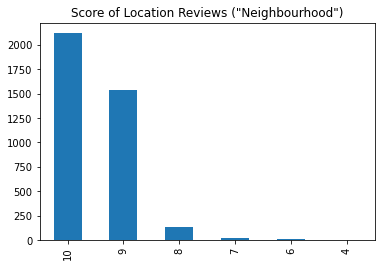

In [11]:
#Viewing the cantity of each value.
(listings_df['review_scores_location'].value_counts()).plot(kind='bar');
plt.title('Score of Location Reviews ("Neighbourhood")');

In [12]:
listings_df['review_scores_location'].value_counts()

10    2122
9     1539
8      129
7       19
6        8
4        1
Name: review_scores_location, dtype: int64

In [13]:
#Looking the mean scores for each neighborhood
mean_score_neighborhood = listings_df.groupby('neighbourhood').mean()['review_scores_location'].sort_values().astype(int)

In [14]:
#The firt 40 neighbourhoods, with their mean score review.
mean_score_neighborhood[:40]

neighbourhood
Pinehurst                 8
South Beacon Hill         8
South Park                8
Holly Park                8
Highland Park             8
Arbor Heights             8
Industrial District       8
Rainier Beach             8
Dunlap                    8
Interbay                  8
South Delridge            8
Cedar Park                8
Brighton                  9
Olympic Hills             9
North College Park        9
Fairmount Park            9
International District    9
Columbia City             9
Haller Lake               9
Atlantic                  9
North Beacon Hill         9
Pioneer Square            9
Georgetown                9
University District       9
Mount Baker               9
Wedgewood                 9
Victory Heights           9
Crown Hill                9
Riverview                 9
Ravenna                   9
Greenwood                 9
Bitter Lake               9
Seward Park               9
Broadview                 9
Meadowbrook               9
Leschi

In [15]:
#The last 41 neighbourhoods, with their mean score review.
mean_score_neighborhood[40:]

neighbourhood
Broadway                      9
Westlake                      9
Eastlake                      9
Magnolia                      9
South Lake Union              9
Roosevelt                     9
Minor                         9
View Ridge                    9
Yesler Terrace                9
Licton Springs                9
Bryant                        9
Mathews Beach                 9
North Beach/Blue Ridge        9
Madison Park                  9
Alki                          9
Phinney Ridge                 9
Windermere                    9
Queen Anne                    9
Harrison/Denny-Blaine         9
First Hill                    9
Montlake                      9
Stevens                       9
Portage Bay                   9
Madrona                       9
Wallingford                   9
Ballard                       9
Seaview                       9
Gatewood                      9
Lower Queen Anne              9
Capitol Hill                  9
Fremont                   

In [16]:
#The mean score of University District.
mean_score_neighborhood['University District']

9

Si vemos los scores que se han otorgado, tenemos unicamente un review malo, que se le otorgo un score de 4, y 8 reviews que se les otorgo un score de 6, aunque tendre que ver uno por uno si este score es malo o bueno.

In [17]:
#The review with the value 4 as score.
list(listings_df['neighborhood_overview'][listings_df['review_scores_location'] == 4])

["It is located in the bustling and vibrant University district. A rare 100 walk score. It is within five minutes' walking distance to the University of Washington. You will have access to a diverse array of restaurants, shops and activities."]

The review no es totalmente buena, pero a pesar que es el unico review con un puntaje de 4, tiene razon con su review, esta hablando sobre University District, e investigando los demas comentarios sobre este district, hablan mas o menos de lo mismo con la unica diferencia que a este usuario le molesta lo que a otros no, vivir cerca de la Universidad es ventaja para otros, pero para este usuario es todo lo contrario, el Distrito no es malo, tiene una de las mejores mean score con un valor de 9, y la mayoria de reviews hablan muy bien de este neighborhood. 

El usuario debio elegir un lugar acorde a sus gustos y necesidades para hospedarse.

### Answer

Como podemos ver, todos los barrios de Seattle tienen buenas puntuaciones, y en promedio no bajan de 8, en total hay 8 calificaciones de 6, y al leerlas me di cuenta que hablaban bien del barrio, y hay 1 puntuacion de 4, la cual ya fue investigada y explicada. 

De ahi no tenemos malas reviews, todas son buenas, lo que indica que la vibra en los barrios de Seattle son buenas, y que debes elegir bien donde ir a hospedarte, segun tu tolerancia y comodidad.

# Question 2:

### What are the busiest times of the year to visit Seattle? By how much do prices spike?

In [18]:
#Convert available values to [0,1], 0 for the value 't' this mean that is available.
#And 1 for the value 'f' mean is not available.
calendar_df['available'] = calendar_df['available'].replace('t', 0)
calendar_df['available'] = calendar_df['available'].replace('f', 1)

In [19]:
#Convert the column price to float and remove the symbols '$' and ','
calendar_df['price'] = calendar_df['price'].str.replace("[$,]","", regex=True).astype(float)

In [20]:
calendar_df['date'] = calendar_df['date'].str.replace("-", "")

In [21]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'], format='%Y%m%d')

In [22]:
calendar_df['price'][(calendar_df['listing_id'] == 241032)].mean()

85.0

In [23]:
set_means = []
for id_ in calendar_df['listing_id'].unique():
    set_means.append(round(calendar_df['price'][calendar_df['listing_id'] == id_].mean(), 1))
len(set_means)

3818

In [24]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  int64         
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 42.5 MB


In [25]:
#Filling the NaN values with the mean of each listing_id.
for lst_id in set(calendar_df['listing_id'].unique()):
    calendar_df['price'][calendar_df['listing_id'] == lst_id].fillna(round(calendar_df['price'][calendar_df['listing_id'] == lst_id].mean(),1), inplace=True)

#And then filling the remaining nan values with the general mean.
calendar_df['price'].fillna(calendar_df['price'].mean(), inplace=True)

In [26]:
calendar_df['price']

0           85.000000
1           85.000000
2          137.944859
3          137.944859
4          137.944859
              ...    
1393565    137.944859
1393566    137.944859
1393567    137.944859
1393568    137.944859
1393569    137.944859
Name: price, Length: 1393570, dtype: float64

In [32]:
calendar_df['month'] = calendar_df['date'].dt.month

In [33]:
#Creating groupby with the months
date_group = calendar_df.groupby('month').sum().reset_index()

Para arreglar los graph debo reemplazar los valores NaN en price, puedo hacerlo por listing_id, es lo mejor, ya que varian entre listing_id.

las graficas ya fueron creadas, solo queda mejorarlas e interpretarlas mejor, y tendre completada la segunda pregunta.

In [37]:
date_group

,month,listing_id,available,price
0,1,635709761880,49603,1.482403e+07
1,2,614519436484,37401,1.427263e+07
2,3,656900087276,34420,1.554622e+07
3,4,635709761880,38503,1.558366e+07
4,5,656900087276,38387,1.645430e+07
5,6,635709761880,37296,1.653621e+07
6,7,656900087276,44136,1.737707e+07
7,8,656900087276,42011,1.729738e+07
8,9,635709761880,37294,1.621046e+07
9,10,656900087276,35920,1.625162e+07


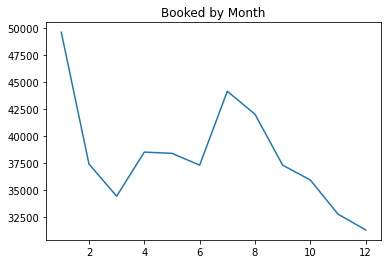

In [38]:
plt.plot(date_group['month'], date_group['available'])
plt.title('Booked by Month')
plt.show()

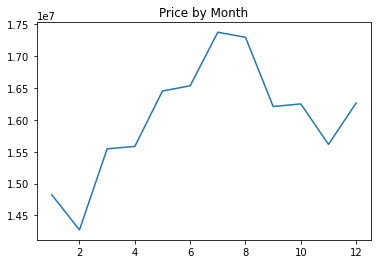

In [39]:
plt.plot(date_group['month'], date_group['price'])
plt.title('Price by Month')
plt.show()

In [ ]:
#Changing the values str with the symbol $ to a int, and eliminated the symbol $.
def price_str_to_float(df, *columns):
    for col in columns:
        for n in df[col]:
            if type(n) != float:
                df[col] = df[col].replace(n, float(n[1:].replace(',','')))
price_str_to_float(listings_df, 'price', 'monthly_price', 'weekly_price', 'cleaning_fee', 'security_deposit', 'extra_people')

In [ ]:
#Changing the values str with the symbol % to a int, and eliminated the symbol %.
def porcentage_str_to_int(df, *columns):
    for col in columns:
        for n in df[col]:
            if type(n) == str:
                df[col] = df[col].replace(n, int(n[:-1]))
porcentage_str_to_int(listings_df, 'host_response_rate', 'host_acceptance_rate')

In [ ]:
listings_df['zipcode']

In [ ]:
#Comparing the columns that have prices like values, for choice a decision to fill the nan values.
listings_df[['price', 'weekly_price', 'monthly_price', 'cleaning_fee', 'security_deposit', 'extra_people']]

In [ ]:
prices_monthly_weekly = round(listings_df['monthly_price']/listings_df['weekly_price'], 0)
prices_normal_monthly = round(listings_df['monthly_price']/listings_df['price'], 0)
prices_normal_weekly = round(listings_df['weekly_price']/listings_df['price'], 0)
prices_cleanfee = round(listings_df['price']/listings_df['cleaning_fee'], 0)
prices_securitydeposit = round(listings_df['price']/listings_df['security_deposit'], 0)

In [ ]:
#prices_monthly_weekly.value_counts()
#prices_normal_weekly.value_counts()
#prices_normal_monthly.value_counts()
#prices_cleanfee.value_counts()
#prices_securitydeposit.value_counts()

In [ ]:
listings_df['extra_people'] = listings_df['extra_people'].fillna(listings_df['extra_people'].mean())

In [ ]:
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].fillna(listings_df['price']*random.choice([1,2,3,4]))

In [ ]:
listings_df['security_deposit'] = listings_df['security_deposit'].fillna(listings_df['price']*random.choice([1,]))

In [ ]:
listings_df['weekly_price'] = listings_df['weekly_price'].fillna(listings_df['price']*6.5)

In [ ]:
listings_df['monthly_price'] = listings_df['monthly_price'].fillna(listings_df['weekly_price']*3.5)

In [ ]:
#Comparing again without nan values
listings_df[['price', 'weekly_price', 'monthly_price', 'cleaning_fee', 'security_deposit', 'extra_people']]

Features that are objects, but should be int or float: 'host_response_rate', 'host_acceptance_rate', 'zipcode', 'price', 'security_deposit', 'cleaning_fee', 'extra_people', 'weekly_price', 'monthly_price'

Luego buscare como rellenar los valores NaN de las variables que tienen valores NaN, ya sea usando las medias, o usando groupby, asi tambien usarlo para las columnas con valores binarios, hay varias, asi que debo sacar las columnas que tengan valores binarios.


Centrate en buscar las features que necesitas para responder las preguntas y solo trabaja en ellas, no pierdas el tiempo en las demas.
